In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

from dotenv import load_dotenv
load_dotenv();

In [2]:
from glassnode_client import GlassnodeAPIClient

In [3]:
client = GlassnodeAPIClient(api_key=os.environ['GLASSNODE_API_KEY'])

In [4]:
client.get_assets_list();

In [5]:
client.get_metrics_list();

In [6]:
client.get_metric_metadata('/addresses/active_count');

### Compare fetch_metric vs. fetch_bulk_metric

In [7]:
since = "2023-01-01"
until = "2025-02-10"

In [8]:
m1 = client.fetch_metric('/market/spot_volume_daily_sum', asset='ETH', e='binance', currency='USD', since=since, until=until)
m2 = client.fetch_bulk_metric('/market/spot_volume_daily_sum', currency='USD', e='binance', paginate=True, since=since, until=until)

In [9]:
# fetch_metric data

timestamps = [entry['t'] for entry in m1]
values = [entry['v'] for entry in m1]
df1 = pd.Series(values, index=pd.to_datetime(timestamps, unit='s'))

In [10]:
# fetch_bulk_metric data

m2 = m2['data']
timestamps = [entry['t'] for entry in m2]
values = []

for entry in m2:
    value = None
    for item in entry['bulk']:
        if item['a'] == 'ETH':
            value = item['v']
            break
    
    if value is None:
        value = 0
    
    values.append(value)

df2 = pd.Series(values, index=pd.to_datetime(timestamps, unit='s'))

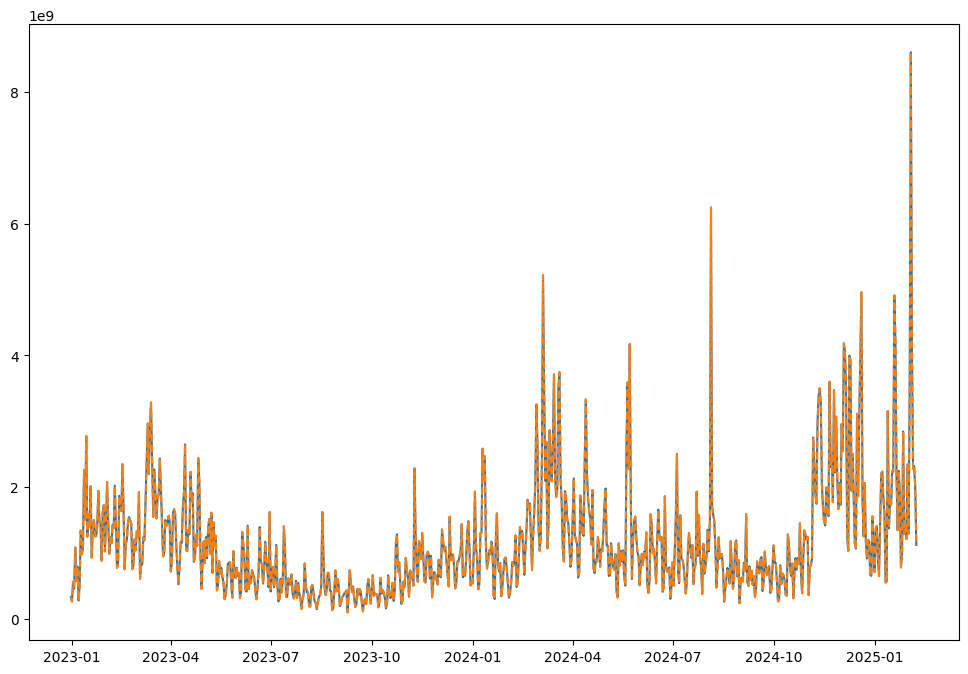

In [11]:
fig, ax = plt.subplots(1, figsize=(12, 8))
ax.plot(df1)
ax.plot(df2, linestyle='--')
plt.show()